In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 11:10:01.539220: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 11:10:01.577703: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 11:10:02.128829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_barba_ruca_art','Cam_santana_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_barba_ruca_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i,'Cam_santana_art']
  
dados = dados[['Ano','Cam_barba_ruca_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_barba_ruca_art'] = dados.loc[i,'Cam_barba_ruca_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_barba_ruca_art'].values
dados.head()

,Ano,Cam_barba_ruca_art,Soma,Prop_Cam_barba_ruca_art
0,1989,4393.0,4394.0,0.999772
1,1996,109.5,150.5,0.727575
2,1997,301.0,468.5,0.642476
3,1998,175.5,266.0,0.659774
4,1999,193.0,292.5,0.659829


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [5]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/pesos prop art 1989-2022/.weights.h5', overwrite=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0077
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9860
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9719
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9597
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9475
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9347
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9231
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9105
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8971
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8844
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8714
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8588
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8456
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8325
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8197
Epoch 16/500
1/1 ━━━━

In [6]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/pesos prop art 1989-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Previsões dos dados ausentes: [[1.        ]
 [0.980945  ]
 [0.95515347]
 [0.92748696]
 [0.8907045 ]
 [0.8469866 ]
 [0.7987843 ]
 [0.73378354]
 [0.6451643 ]
 [0.66045743]
 [0.66035783]
 [0.65988463]
 [0.6579414 ]
 [0.6539447 ]
 [0.65516865]
 [0.6495651 ]
 [0.6379198 ]
 [0.65743935]
 [0.86104316]
 [0.8698929 ]
 [0.06879318]
 [0.        ]
 [0.06438547]
 [0.2944665 ]
 [0.52264875]
 [0.71591824]
 [0.75619996]
 [0.79856724]
 [0.8555789 ]
 [0.91343975]
 [0.8509672 ]
 [0.74954593]
 [0.7050696 ]
 [0.66116226]]


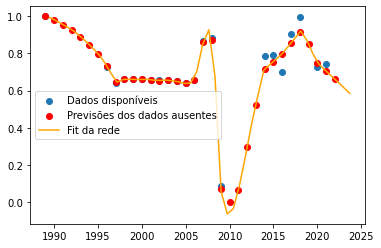

In [7]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

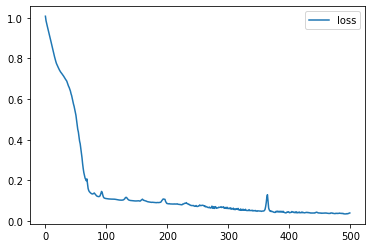

In [8]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [9]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_art(sem sete barbas , branco, rosa)
df_prev_Camarao_art = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_art_sem_sb_br_ro.xlsx')

for i in range(len(df_prev_Camarao_art['Ano'])):
       df.loc[i,'Camarao_art'] = df_prev_Camarao_art.loc[i,'Camarao_art']


df_preenchido = df[['Ano','Cam_barba_ruca_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_barba_ruca_art']=df_preenchido.loc[i,'Cam_barba_ruca_art']+df.loc[i,'Camarao_art']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_art']*prev_continua[i]
      

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/Previsão Camarao_barba_ruca_art_1989-2022.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
     Ano  Cam_barba_ruca_art  Valor acrescido
0   1950            0.000000         0.000000
1   1951            0.000000         0.000000
2   1952            0.000000         0.000000
3   1953            0.000000         0.000000
4   1954            0.000000         0.000000
5   1955            0.000000         0.000000
6   1956            0.000000         0.000000
7   1957            0.000000         0.000000
8   1958            0.000000         0.000000
9   1959            0.000000         0.000000
10  1960            0.000000         0.000000
11  1961            0.000000         0.000000
12  1962            0.000000         0.000000
13  1963            0.000000         0.000000
14  1964            0.000000         0.000000
15  1965            0.000000         0.000000
16  1966            0.000000         0.000000
17  1967            0.000000         0.000000
18  1968            0.000000         0.000000
19  1969            0.000000         0.000

In [10]:
#Planilha com Camarao_art decrescido do que ja foi usado de 1989 ate 2022
Cam_art_sem_sb_br_ro_ru_89_22 = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_art_sem_sb_br_ro_ru_89_22.loc[i,'Camarao_art']-=Cam_art_sem_sb_br_ro_ru_89_22.loc[i,'Camarao_art']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_br_ro_ru_89_22)

Cam_art_sem_sb_br_ro_ru_89_22.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/Cam_art_sem_sb_br_ro_ru_89-22.xlsx')

     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975     0.000000
26  1976     0.000000
27  1977     0.000000
28  1978     0.000000
29  1979     0.000000
30  1980     0.000000
31  1981     0.000000
32  1982     0.000000
33  1983     0.000000
34  1984     0.000000
35  1985     0.000000
36  1986     0.000000
37  1987     0.000000
38  1988     0.000000
39  1989     0.000000
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  

In [11]:
#Fazendo uma planilha com Camarao_art decrescido do que ja foi retirado em todos os anos   (sete barbas,branco,rosa,barba_ruca)

Cam_art_sem_sb_br_ro_ru = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(Cam_art_sem_sb_br_ro_ru['Ano'])):
    if i+1950 in range(1950,1989):
        Cam_art_sem_sb_br_ro_ru.loc[i,'Camarao_art'] = 0
    else:
        Cam_art_sem_sb_br_ro_ru.loc[i,'Camarao_art'] = Cam_art_sem_sb_br_ro_ru_89_22.loc[i,'Camarao_art'] 

with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_br_ro_ru)

Cam_art_sem_sb_br_ro_ru.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_barba_ruca/Cam_art_sem_sb_br_ro_ru.xlsx')


     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975     0.000000
26  1976     0.000000
27  1977     0.000000
28  1978     0.000000
29  1979     0.000000
30  1980     0.000000
31  1981     0.000000
32  1982     0.000000
33  1983     0.000000
34  1984     0.000000
35  1985     0.000000
36  1986     0.000000
37  1987     0.000000
38  1988     0.000000
39  1989     0.000000
40  1990     0.000000
41  1991     0.000000
42  1992     0.000000
43  1993     0.000000
44  1994  